# **CSI 4142 Assignment 1**
**Group 119:**\
Sami Hassan,
300169285\
Yassine Sami, 300146704




> # **Introduction**

The goal of this report is to analyze two different datasets and formulate insights based on the data that can be backed up using visualization tools as well as univariate and bivariate analysis. 

The first dataset, "Mobile Device Usage and User Behavior Dataset" examines trends among mobile device users and how the different metrics gathered can effect their usage behavior. The findings from the first dataset are targeted towards any stakeholders in the mobile technology industry who focus on exploring usage trends and behavior patterns. This could include product managers, marketing teams, executives. 

The second dataset... [YASSINE PART]

In [42]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# loading data set
first_data_set = pd.read_csv('https://raw.githubusercontent.com/yasssami/csi4142/master/datasets/user_behavior_dataset.csv')
placement_dataset = pd.read_csv('https://raw.githubusercontent.com/yasssami/csi4142/master/datasets/placementdata.csv')


# **Dataset 1: Mobile Device Usage and User Behavior Data Analysis**


> ## Dataset Description

\
The dataset "Mobile Device Usage and User Behavior Data Analysis" was published by Vala Kohorasani. The data analyzes and explores the key metrics of mobile device users and assigns them a User Behavior Class based on the level of device usage. The dataset contains 700 unique entries and 11 attributes.

\


The attributes outlined by the dataset:

* **User ID:** A unique identifier for each user, up to three digits.
* **Device Model:** The user's smartphone model, five different options.
* **Operating System:** The OS the smartphone runs on, either iOS or Android.
* **App Usage Time (min/day):** The user's time spent on mobile applications per day, measured in minutes.
* **Screen On Time (hours/day):** The user's time spent with the screen on per day, measured in hours.
* **Battery Drain (mAh/day):** The amount of battery the user consumes per day, measured in mAh.
* **Number of Apps Installed:** Total number of applications installed on the user's device.
* **Data Usage (MB/day):** The amount of data the user consumes per day, measured in MB.
* **Age:** Age of the user.
* **Gender:** Gender of the user (Male or Female).
* **User Behavior Class:** Classification of user behavior based on usage patterns (1 to 5).

\
There are no redundant values as each entry has a unique User ID. There is also no missing values, as the non-null count is 0 for every row in the table below.





In [3]:
# built-in panda function to data set's info
first_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


> ## **Insights**


###  Insight 1

To reduce battery drain, users should limit their screen time and uninstall unused apps.

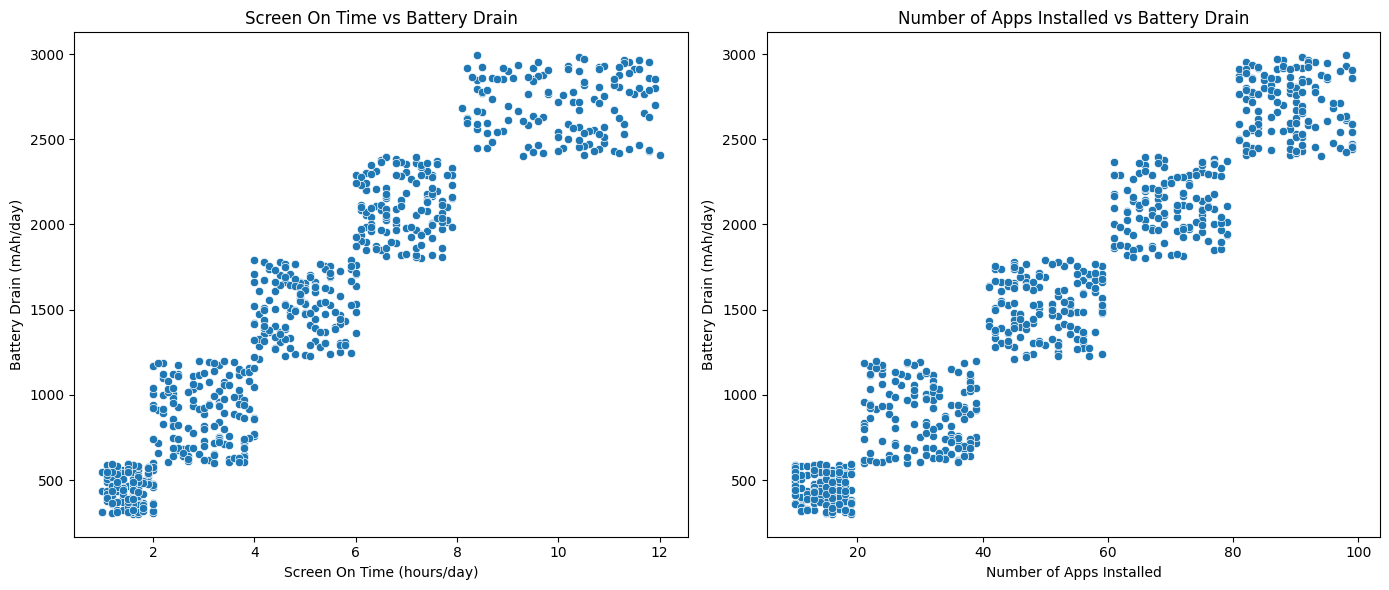

In [4]:
# source: matplotlib (https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html)

# creating a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# scatter plot for screen on time vs battery drain
sns.scatterplot(ax=axes[0], x='Screen On Time (hours/day)', y='Battery Drain (mAh/day)', data=first_data_set)
axes[0].set_title('Screen On Time vs Battery Drain')
axes[0].set_xlabel('Screen On Time (hours/day)')
axes[0].set_ylabel('Battery Drain (mAh/day)')


# scatter plot for # of apps installed vs battery drain
sns.scatterplot(ax=axes[1], x='Number of Apps Installed', y='Battery Drain (mAh/day)', data=first_data_set)
axes[1].set_title('Number of Apps Installed vs Battery Drain')
axes[1].set_xlabel('Number of Apps Installed')
axes[1].set_ylabel('Battery Drain (mAh/day)')

# adjusting layout + showing plots
plt.tight_layout()
plt.show()

**Explaination:** The figure above shows two scatterplots, the left one comparing screen on time to battery drainage, and the right one comparing the number of apps installed to battery drainage. The left scatterplot shows that longer screen on time leads to higher battery drain, and the right scatterplot shows that more installed apps will lead to higher battery drain. The two plots show a positive correlation because one variable increases as the other variable increases. The analysis of this insight falls under bivariate analysis **(r6)** because the three variables all use numerical values as their data types, and the correlations are shown using scatterplots.

### Insight 2

Most users surveyed fall into a "High" screen time category of more than 6 hours per day.

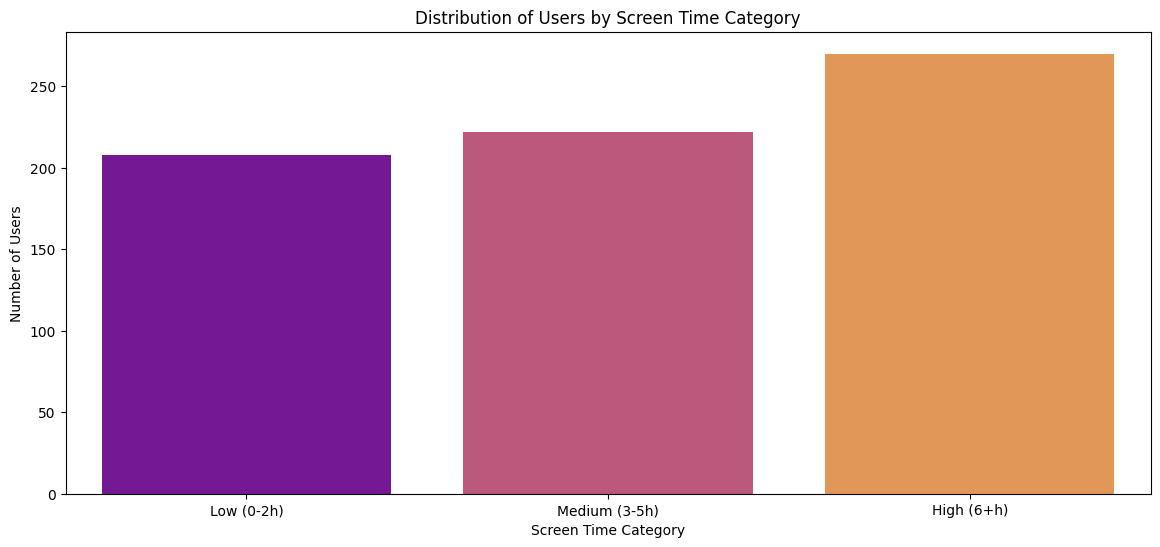

In [5]:
# countplot code: https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/

# group screen on time into categories
screen_bins = [0, 3, 6, 24]
screen_labels = ['Low (0-2h)', 'Medium (3-5h)', 'High (6+h)']
first_data_set['Screen Time (hours/day)'] = pd.cut(first_data_set['Screen On Time (hours/day)'], bins=screen_bins, labels=screen_labels)

# figure sizing
plt.figure(figsize=(14, 6))

# grouped countplot for distribution of users by screen time category
sns.countplot(x='Screen Time (hours/day)', hue='Screen Time (hours/day)', palette='plasma', data=first_data_set, order=screen_labels)
plt.title('Distribution of Users by Screen Time Category')
plt.xlabel('Screen Time Category')
plt.ylabel('Number of Users')
plt.show()

**Explanation:** The above figure is a grouped-data countplot that visualizes the distribution of Users by Screen Time with the hours per day grouped into three categories. A user's screen time can be either **Low (0-2 hours), Medium (3-5 hours), or High (6+ hours)**, with most users surveyed being in the High screentime category. The analysis falls under univariate analysis **(r3)** because there is only one variable (Screen Time) grouped into three categories.

### Insight 3

Male mobile device users have a higher app usage time than female mobile device users.

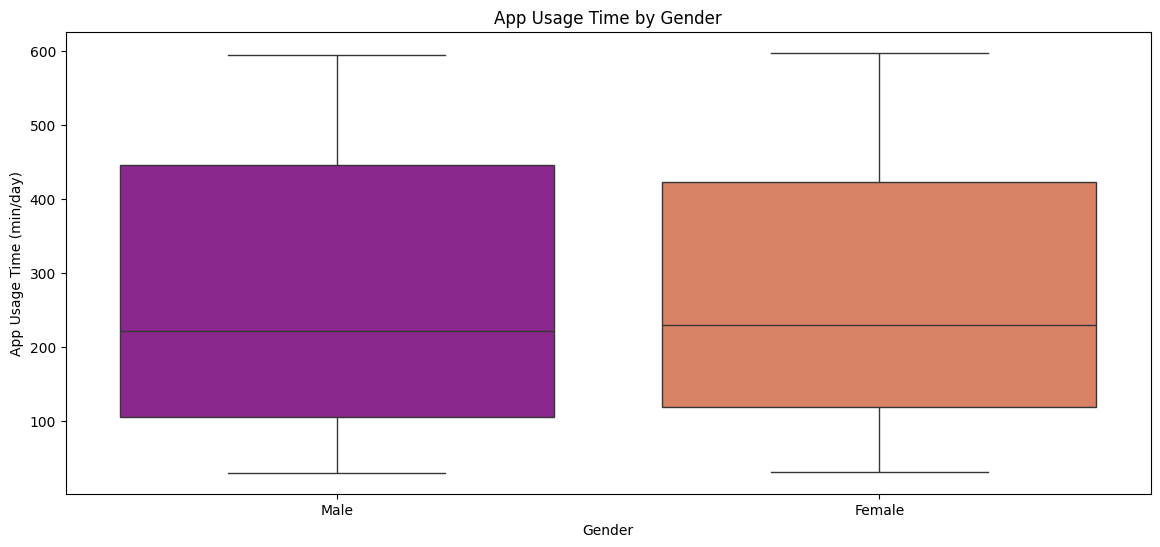

In [6]:
# figure sizing
plt.figure(figsize=(14, 6))

# boxplot comparing app usage time by gender
sns.boxplot(x='Gender', y='App Usage Time (min/day)', hue='Gender', data=first_data_set, palette='plasma')
plt.title('App Usage Time by Gender')
plt.xlabel('Gender')
plt.ylabel('App Usage Time (min/day)')
plt.show()

**Explanation:**  The above figure uses a boxplot to model the app usage time in minutes/day between male and female mobile device users. The model shows that male users are using the apps on their devices 7.69% longer than the female users. This analysis falls under bivariate analysis **(r7)** because it compares two variables, app usage time (numerical) and gender (categorical) and splits the data in categories based on the genders male and female.


In [7]:
# pandas indexing + sum code from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html

# calculating total male app usage
app_usage_m = first_data_set[first_data_set['Gender'] == 'Male']['App Usage Time (min/day)'].sum()

# calculating total female app usage
app_usage_f = first_data_set[first_data_set['Gender'] == 'Female']['App Usage Time (min/day)'].sum()

# displaying results
print(f'Total App Usage for Males: {app_usage_m} min/day')
print(f'Total App Usage for Females: {app_usage_f} min/day')
print(f'Percent Difference between Male and Female Users: {((app_usage_m/app_usage_f)-1) * 100} %')


Total App Usage for Males: 98409 min/day
Total App Usage for Females: 91381 min/day
Percent Difference between Male and Female Users: 7.6908766592617805 %


### Insight 4

A majority of surveyed users are using less than 1000 MB of mobile data on their devices per day.

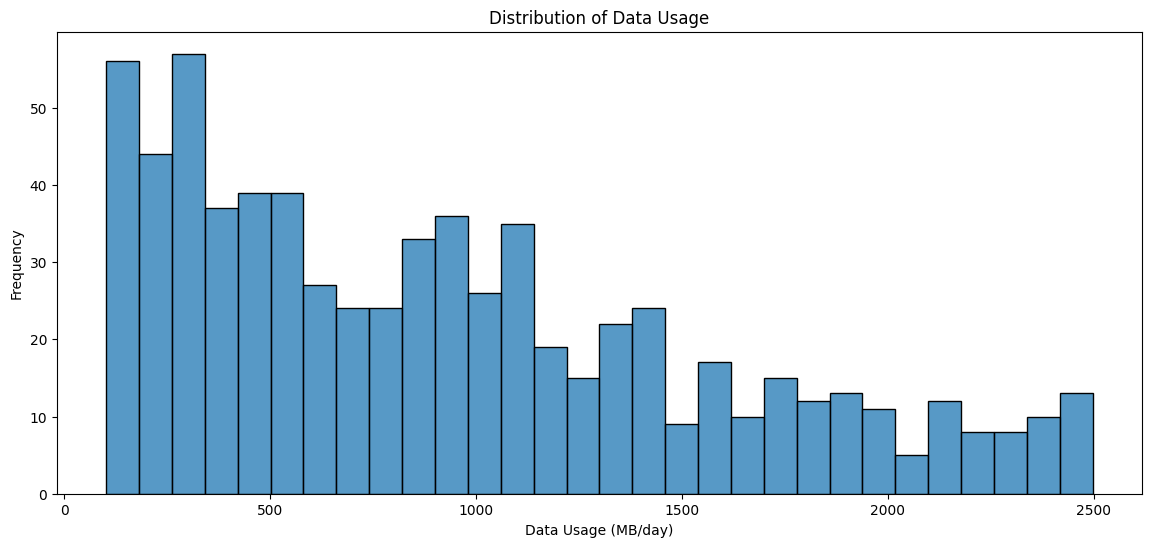

In [8]:
# histogram code from https://matplotlib.org/stable/gallery/statistics/hist.html

# figure sizing
plt.figure(figsize=(14, 6))

# histogram of data usage levels
sns.histplot(first_data_set['Data Usage (MB/day)'], bins=30)
plt.title('Distribution of Data Usage')
plt.xlabel('Data Usage (MB/day)')
plt.ylabel('Frequency')
plt.show()

**Explanation:** The above figure is a histogram showing the distribution of data usage measured in MB/day across users. The graph is right-skewed, most users have lower data usage. Out of the users surveyed, 425/700 use less than 1000 MB of data per day, which is equivalent to 60.7% of users. This analysis falls under univariate analysis **(r1)** as the dispersion of one numerical variable is being visualized in this histogram.

In [9]:
# pandas indexing + sum code from https://www.geeksforgeeks.org/how-to-count-occurrences-of-specific-value-in-pandas-column/

# calculating % of users using <1000MB/day
data_usage = (first_data_set['Data Usage (MB/day)'] < 1000).sum()
print(f'Percent of users using <1000 MB/day: {(data_usage.sum() / 700) * 100} %')

Percent of users using <1000 MB/day: 60.71428571428571 %


### Insight 5

The majority of surveyed users end up in User Behavior Class #2, making up 20.9% of users.

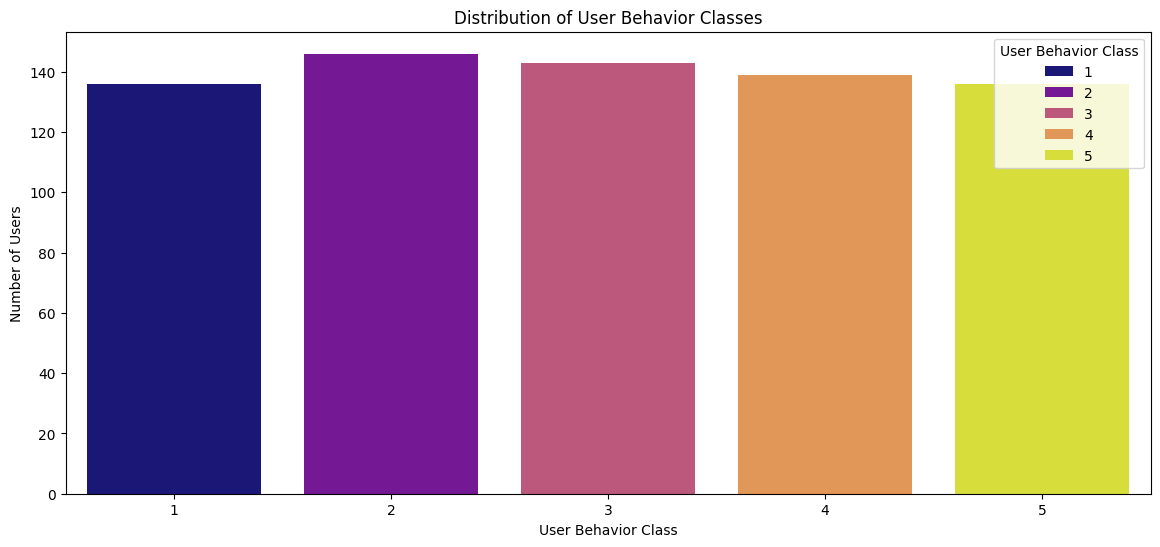

In [10]:
# figure sizing
plt.figure(figsize=(14, 6))

# countplot to visualize distribution of user behavior classes
sns.countplot(x='User Behavior Class', hue='User Behavior Class', palette='plasma', data=first_data_set)
plt.title('Distribution of User Behavior Classes')
plt.xlabel('User Behavior Class')
plt.ylabel('Number of Users')
plt.show()

**Explanation:** The above figure is a countplot that visualizes the distribution of user behavior classes, with User Behavior Class #2 having 146/700 users within (20.9%). The analysis of this insights falls under univariate analysis **(r2)** because the figure is a count plot for a single categorical variable (User Behavior Class) with multiple values (1-5).

In [11]:
# calculating % of users in Behavior Class #2
behavior_classes = (first_data_set['User Behavior Class'] == 2).sum()
print(f'Percentage of users in User Behavior Class #2: {(behavior_classes/700) * 100}%')

Percentage of users in User Behavior Class #2: 20.857142857142858%


### Insight 6

Users belonging to User Behavior Class #5 use more data per day than users belonging to User Behavior Classes #1, #2, and #3 combined.

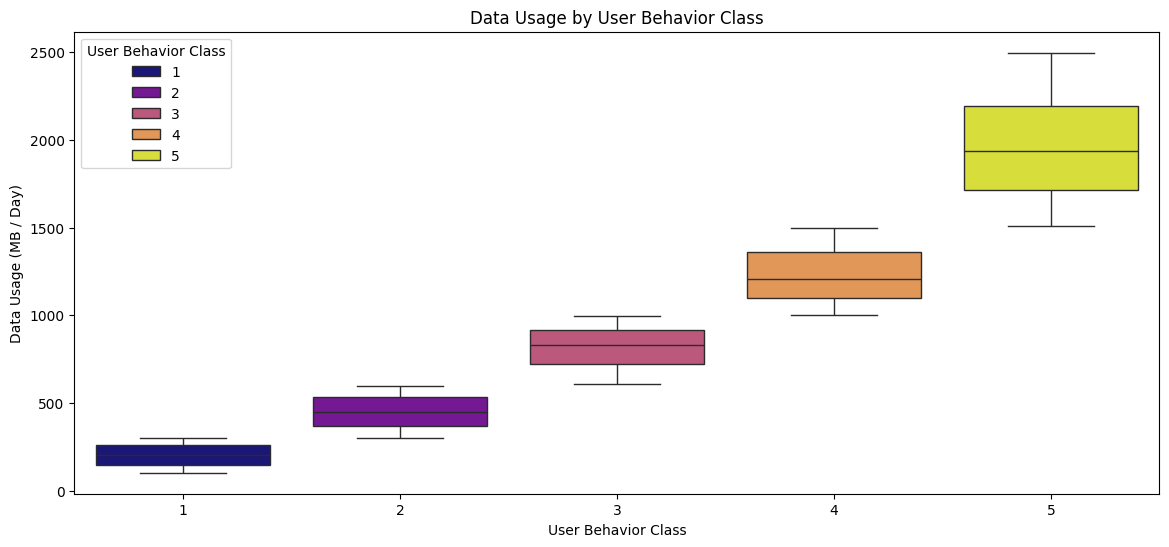

In [12]:
# figure sizing
plt.figure(figsize=(14, 6))

# boxplot to compare data usage by behavior class
sns.boxplot(x='User Behavior Class', y='Data Usage (MB/day)', hue='User Behavior Class', palette='plasma', data=first_data_set)
plt.title('Data Usage by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Data Usage (MB / Day)')
plt.show()


**Explanation:**  The above figure uses a boxplot to model the usage of data in MB/day throughout the five user behavior classes. The model shows that users in the first three user behavior classes use less data combined than users in user behavior class 5. The total data used throughout users in behavior class 5 turned out to be 27.3% more than the data used by users in the first three behavior classes. This analysis falls under bivariate analysis **(r7)** because it compares two variables, data usage (numerical) and user behavior class (categorical) and splits the data in categories based on the user behavior levels.

In [13]:
# calculating sum of data usage for classes #1, #2, #3
data_usage_123 = first_data_set[first_data_set['User Behavior Class'].isin([1, 2, 3])]['Data Usage (MB/day)'].sum()

# calculating sum of data usage for classes #5
data_usage_5 = first_data_set[first_data_set['User Behavior Class'] == 5]['Data Usage (MB/day)'].sum()

print(f"Total Data Usage (Classes #1, #2, #3): {data_usage_123} MB/day")
print(f"Total Data Usage (Class #5): {data_usage_5} MB/day")
print(f"Percent Difference: {((data_usage_5/data_usage_123)-1) * 100}%")

Total Data Usage (Classes #1, #2, #3): 210971 MB/day
Total Data Usage (Class #5): 268569 MB/day
Percent Difference: 27.301382654488048%


### Insight 7

A majority of users between the ages 25 and 34 exhibit one of the two extremes in mobile device usage behavior levels.

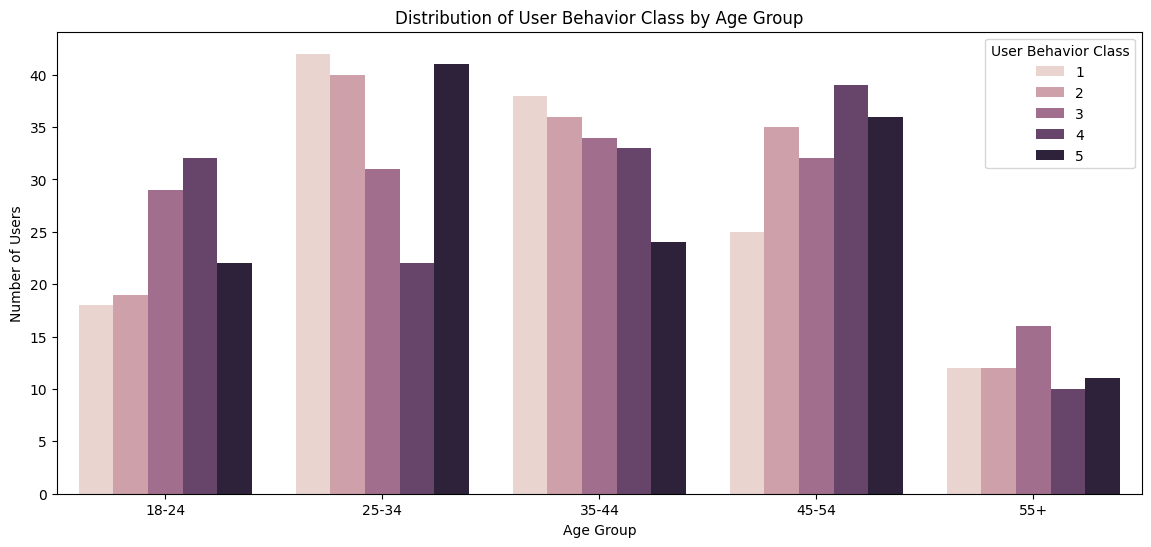

In [14]:
# grouping ages into categories
age_bins = [18, 25, 35, 45, 55, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55+']

# assigning to each bin
first_data_set['Age'] = pd.cut(first_data_set['Age'], bins=age_bins, labels=age_labels)

# figure sizing
plt.figure(figsize=(14, 6))

# countplot to visualize distribution of user behavior class by age group
sns.countplot(x='Age', hue='User Behavior Class', data=first_data_set, order=age_labels)
plt.title('Distribution of User Behavior Class by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.legend(title='User Behavior Class')
plt.show()



**Explanation:** When comparing the distribution of user behavior class by age group in the count plot above, there seems to be a bimodal distribution with two peaks, with a significant number of users with low usage (User Behavior Class #1) and another significant number of users with high usage (User Behavior Class #5). The pattern suggests a divide between the high and low usage groups. The analysis of this insight falls under bivariate analysis **(r5)**. The two categorical variables (user behavior class & age group) are being compared across ordered categories based on age group (18-24, 25-34, 35-44, 45-54, 55+) to visualize how mobile usage behavior levels vary across different age groups.

### Insight 8

Mobile devices running iOS have more female users, while devices running Android have more male users.

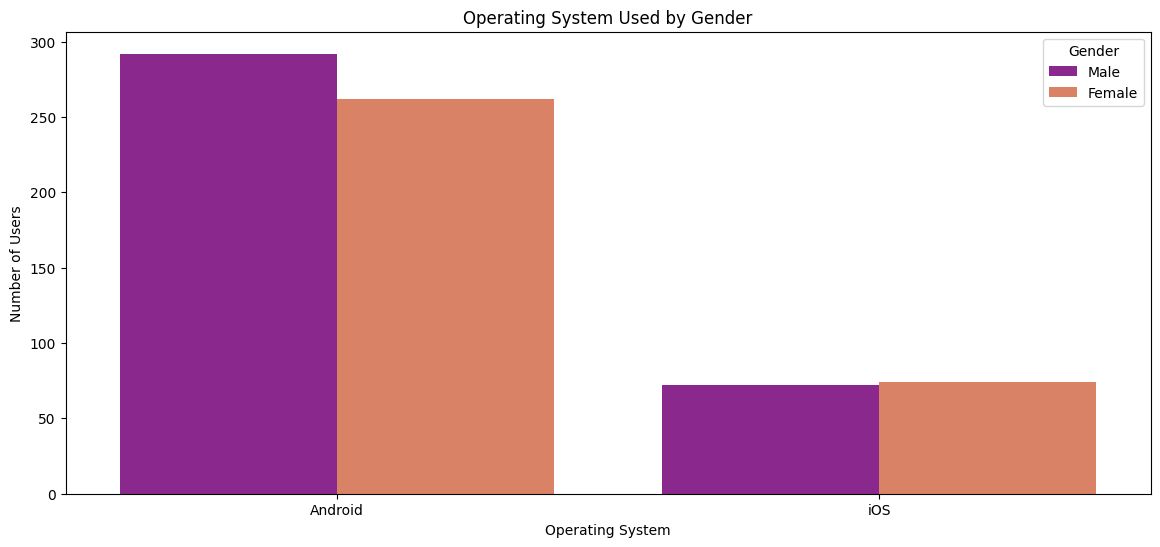

In [15]:
# figure sizing
plt.figure(figsize=(14, 6))

# countplot to visualize operating system used across gender
sns.countplot(x='Operating System', hue='Gender', palette='plasma', data=first_data_set)
plt.title('Operating System Used by Gender')
plt.xlabel('Operating System')
plt.ylabel('Number of Users')
plt.legend(title='Gender')
plt.show()


**Explanation:** The above figure shows a countplot that shows the difference between operating system used for a mobile device based on the gender of a user by comparing the distribution of male or female Android users with male or female iOS users. Examining the figure, it is shown that there are slightly more female iOS users and more Android users compared to their opposite gender counterparts. This comparison falls under bivariate analysis **(r4)** as it involves two categorical variables (Operating System and Gender) that each have two values.

### Insight 9

Surveyed users with a higher number of apps installed on their mobile device have a higher app usage times per day.

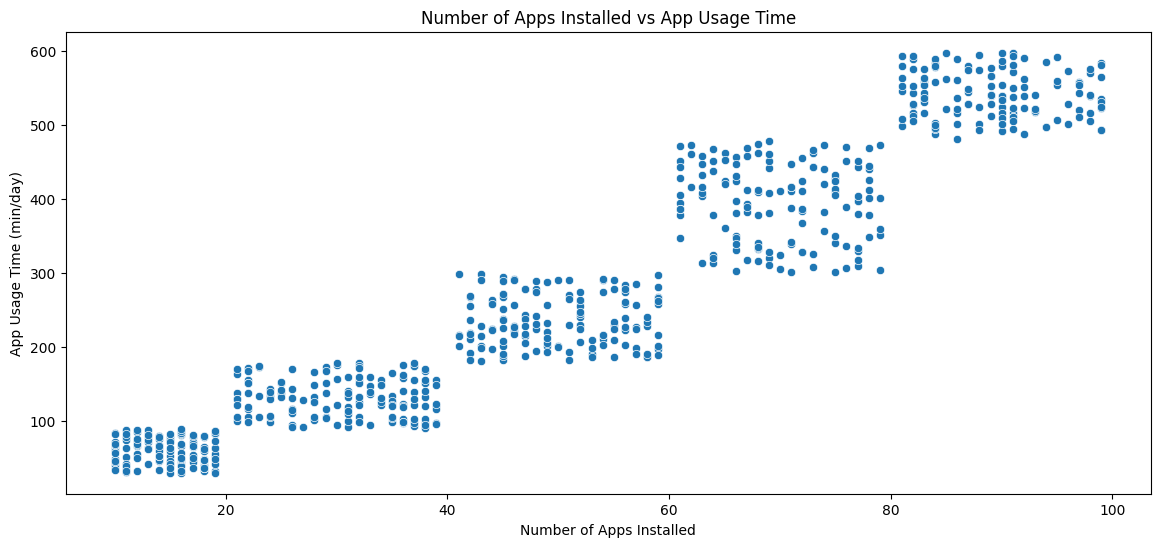

In [16]:
# figure sizing
plt.figure(figsize=(14, 6))

# scatter plot for screen on time vs battery drain
sns.scatterplot(x='Number of Apps Installed', y='App Usage Time (min/day)', data=first_data_set)
plt.title('Number of Apps Installed vs App Usage Time')
plt.xlabel('Number of Apps Installed')
plt.ylabel('App Usage Time (min/day)')
plt.show()

**Explaination:** The figure above shows a scatterplot comparing the number of apps installed on a user's mobile device to a user's app usage time in minutes per day. The right scatterplot shows that more installed apps will lead to higher app usage time per day. The plot shows a positive correlation because one variable increases as the other variable increases. The analysis of this insight falls under bivariate analysis **(r6)** because the two variables that use numerical values as their data types, and the correlation is shown using scatterplots.

### Insight 10

The median screen on time on the iPhone 12 will be higher than any other device's median.

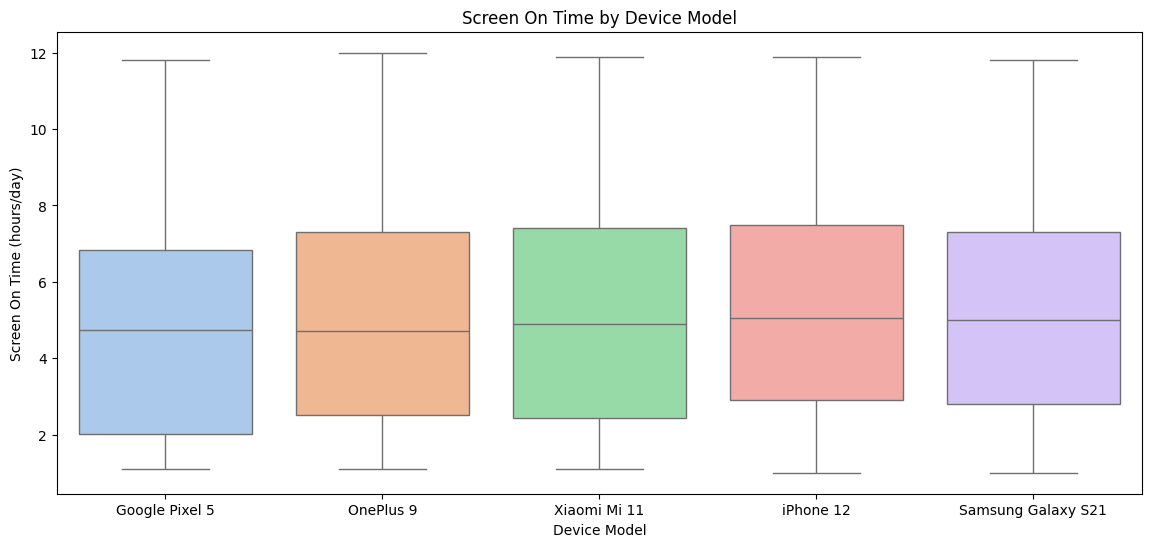

In [17]:
# figure sizing
plt.figure(figsize=(14, 6))

# boxplot comparing screen on time by device model
sns.boxplot(x='Device Model', y='Screen On Time (hours/day)', hue='Device Model', palette='pastel', data=first_data_set)
plt.title('Screen On Time by Device Model')
plt.xlabel('Device Model')
plt.ylabel('Screen On Time (hours/day)')
plt.show()


**Explanation:**  The above figure uses a boxplot to model the screen on time measured in hours/day among the five different device models. The model shows that the median screen on time of the iPhone 12 will be higher than the median of the other four devices. This can be proved by examining the median line within each box, with the iPhone 12's being the highest. The median was also calculated with the the highest median being 5.05, accurately reflecting the graph. This analysis falls under bivariate analysis **(r7)** because it compares two variables, data usage (numerical) and user behavior class (categorical) and splits the data in categories based on the user behavior levels.

In [18]:
# graph comparing medians
screen_time_stats = first_data_set.groupby('Device Model')['Screen On Time (hours/day)'].median()
print(screen_time_stats)

Device Model
Google Pixel 5        4.75
OnePlus 9             4.70
Samsung Galaxy S21    5.00
Xiaomi Mi 11          4.90
iPhone 12             5.05
Name: Screen On Time (hours/day), dtype: float64


# **Dataset 2: Student Placement Prediction**

> ## Dataset Description

The dataset "Placement Prediction Dataset" published by Kaggle user Ruchika Kumbhar analyzes students' success in securing a placement in relation to various metrics.
The dataset boasts 10000 entries, each comprised of data pertinent to the following 12 features (columns):


### Numerical (9):

* **StudentID :** A sequential marker, assigning each student to a distinct value from 1 to 10000
* **CGPA:** The student's cumulative grade point average
* **Internships:** A count of the number of internships completed by the student
* **Projects:** A count of the number of projects undertaken by the student
* **Workshops/Certifications:** A count of the number of workshops the student has opted into
* **AptitudeTestScore:** The student's score in a test assessing their Quant/Logical thinking
* **SoftSkillrating:** The student's soft skill rating, a marker of their competency in working alongside others among other aspects of life
* **SSC_Marks :** The student's Senior Secondary marks, an academic marker
* **HSC_Marks :** The student's Higher Secondary marks, an academic marker

### Categorical (3):

* **ExtracurricularActivities:** Denotes whether a student participates in extracurricular activites of any kind, each entry assigned either "Yes" or "No" values
* **PlacementTraining:** Denotes whether a student took part in the placement training provided in college, each entry assigned either "Yes" or "No" values
* **PlacementStatus:** The target feature. Denotes whether a student successfully secured placement, each entry assigned either "Placed" or "NotPlaced" values

A cursory check signals no redundancies as there are 10000 distinct entries and no missing values among our attributes

In [124]:
placement_dataset.info()

# Check that the StudentID column contains 10000 unique entries
df = pd.DataFrame(placement_dataset)
student_ids = { num_id: None for num_id in df["StudentID"] if num_id != None }
print(len(student_ids))
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB
10000


,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


> ## **Insights**

### Insight 1:

_The CGPA distribution is multimodal, peaking at various intervals with an overwhelming majority of applicants scoring above 7.0_

This insight analyses & visualizes dispersion for a single variable, thus satisfying the R1 requirement, the plot outlining how our samples are distributed.

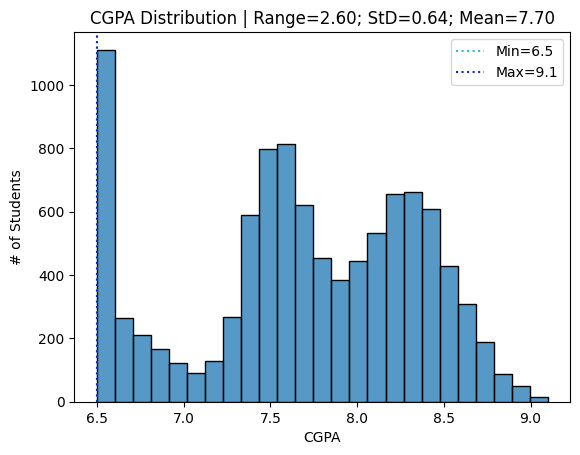

In [80]:
min_cgpa, max_cgpa, std_cgpa, mean_cgpa = df['CGPA'].min(), df['CGPA'].max(), df['CGPA'].std(), df['CGPA'].mean()
range_cgpa = max_cgpa - min_cgpa

ax = sns.histplot(data=df, x='CGPA', bins=25)
ax.set(title=f"CGPA Distribution | Range={range_cgpa:.2f}; StD={std_cgpa:.2f}; Mean={mean_cgpa:.2f}", xlabel='CGPA', ylabel='# of Students')
plt.axvline(min_cgpa, color='#26bcd9', linestyle=':', label=f'Min={min_cgpa}')
plt.axvline(min_cgpa, color='#0e2bc0', linestyle=':', label=f'Max={max_cgpa}')
plt.legend()

### Insight 2:

_The majority of applicants did not secure placement_

Our countplot clearly illustrates the gap in samples at a single variable (PlacementStatus) skewing towards the NotPlaced status, demonstrating the majority of that category. In doing so, we have fulfilled the R2 requirement.

[Text(0.5, 1.0, 'Placement Status Distribution'),
 Text(0.5, 0, 'Status'),
 Text(0, 0.5, '# of Students')]

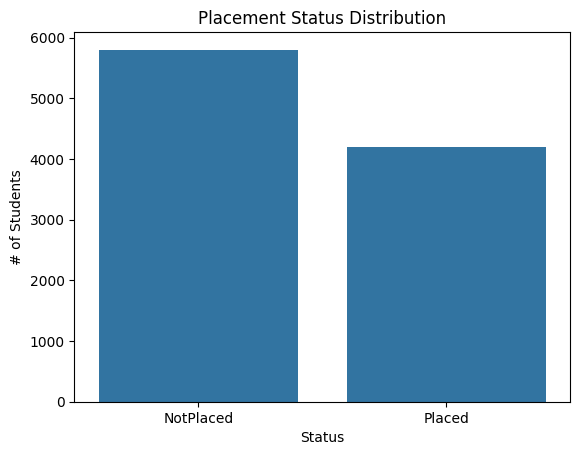

In [85]:
axp = sns.countplot(data=df, x='PlacementStatus')
axp.set(title='Placement Status Distribution', xlabel='Status', ylabel='# of Students')

### Insights 3 & 4:

_The overwhelming majority of students have taken on at least one project_ | _Likelihood of securing placement increases with number of projects taken on_

To account for the dataset's lack of >2-category features, we have decided to evaluate students' success rate vis-a-vis the number of projects completed. In making groupings of 0, 1-2, and 3+, we have shed light on the fact that the overwhelming majority of students undertook at least one project (R3), and that students having completed 3+ projects are the only category where the likelihood of securing a placement not only exceeds the likelihood of the contrary, but eclipses it. On the other hand, completing 1-2 projects seems to still bode unlikely odds in securing placement, whilst the number of students having completed no projects whatsoever is too low for us to comfortably draw a conclusion as to the correlation. This analysis satisfies the R5 requirement.

[Text(0.5, 1.0, 'Projects vs Placement'),
 Text(0.5, 0, 'Project Count Range'),
 Text(0, 0.5, '# of Students')]

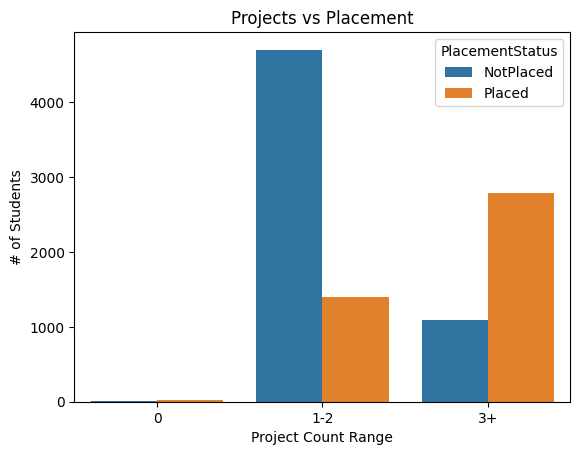

In [95]:
df['ProjectRange'] = pd.cut(df['Projects'], bins=[-1, 0, 2, np.inf], labels=['0', '1-2', '3+'])
sns.countplot(data=df, x='ProjectRange', hue='PlacementStatus').set(title='Projects vs Placement', xlabel='Project Count Range', ylabel='# of Students')


### Insight 5:

_Likelihood of securing placement increases with completion of placement training_

As outlined in the plot below, applicants that took the placement training overwhelmingly outperform their counterparts, even defeating the skewed baseline odds. This analysis pertaining to the PlacementTraining & PlacementStatus categories fulfills the R4 requirement. 

<AxesSubplot:title={'center':'Placement Training Impact'}, xlabel='PlacementTraining', ylabel='# of Students'>

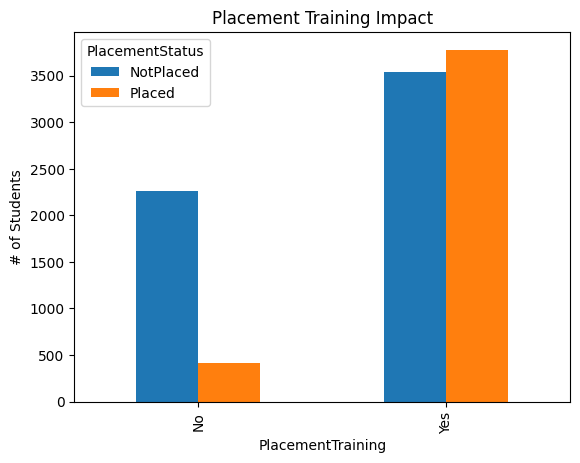

In [111]:
pd.crosstab(df['PlacementTraining'], df['PlacementStatus']).plot(kind='bar', ylabel='# of Students', stacked=False, title='Placement Training Impact')


### Insight 6:

_CGPA and Aptitude Score are moderately correlated_

The CGPA and Aptitude Score features, as shown by the calculations & scatter plot, are moderately correlated. This bivariate numerical/numerical analysis satisfies R6.

                      CGPA  AptitudeTestScore
CGPA               1.00000            0.46125
AptitudeTestScore  0.46125            1.00000


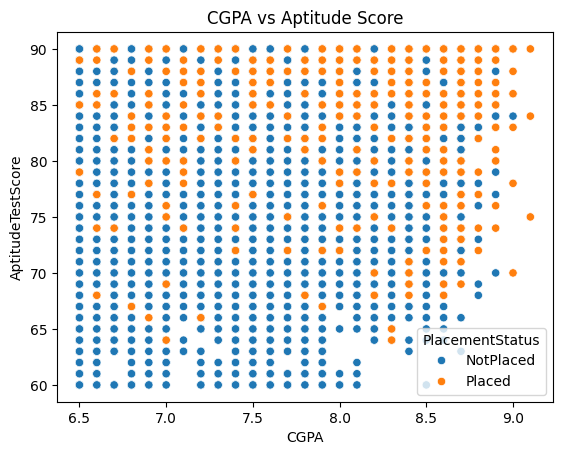

In [103]:
sns.scatterplot(data=df, x='CGPA', y='AptitudeTestScore', hue='PlacementStatus').set(title='CGPA vs Aptitude Score')
print(df[['CGPA','AptitudeTestScore']].corr())

### Insight 7:

_Placed students academically outperform their counterparts_

The boxplot & calculations below display a clear discrepancy in CGPA performance among the placed vs unplaced groups. This bivariate numerical/categorical analysis satisfies R7.

Median CGPA of samples:
Placed: 8.2
Not Placed: 7.5



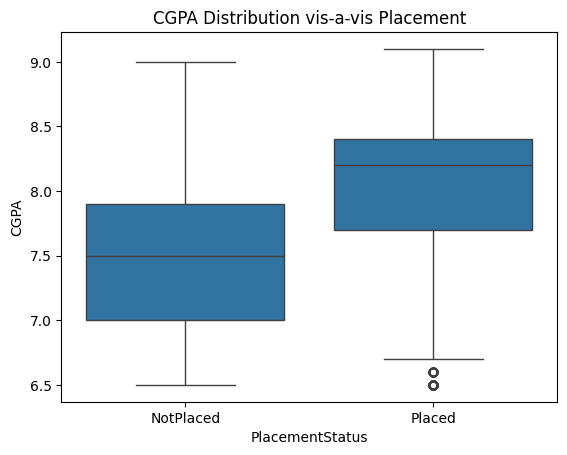

In [ ]:
sns.boxplot(data=df, x='PlacementStatus', y='CGPA').set(title='CGPA Distribution vis-a-vis Placement')

median_placed = df[df['PlacementStatus'] == 'Placed']['CGPA'].median()
median_notplaced = df[df['PlacementStatus'] != 'Placed']['CGPA'].median()

print(f"Median CGPA of samples:\nPlaced: {median_placed}\nNot Placed: {median_notplaced}\n")

### Insight 8:

_Placed students outperform their counterparts in soft skill rating_

The boxplot & calculations below display an advantageous rating among the placed group over the unplaced group in terms of soft skill rating.

Median soft skill rating of samples:
Placed: 4.6
Not Placed: 4.2



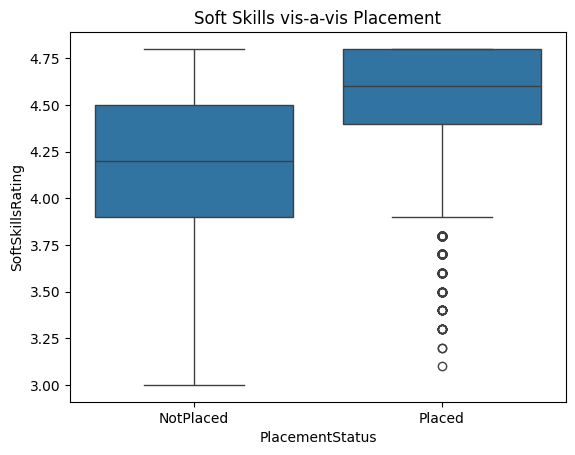

In [109]:
sns.boxplot(data=df, x='PlacementStatus', y='SoftSkillsRating').set(title='Soft Skills vis-a-vis Placement')

median_placed = df[df['PlacementStatus'] == 'Placed']['SoftSkillsRating'].median()
median_notplaced = df[df['PlacementStatus'] != 'Placed']['SoftSkillsRating'].median()

print(f"Median soft skill rating of samples:\nPlaced: {median_placed}\nNot Placed: {median_notplaced}\n")

### Insight 9:

_Participation in extracurricular activities increases likelihood of placement_

The plot & moderate correlation calculated below suggest that participation in extracurricular activities boosts chances at securing placement

                           ExtracurricularActivities  PlacementStatus
ExtracurricularActivities                   1.000000         0.482491
PlacementStatus                             0.482491         1.000000


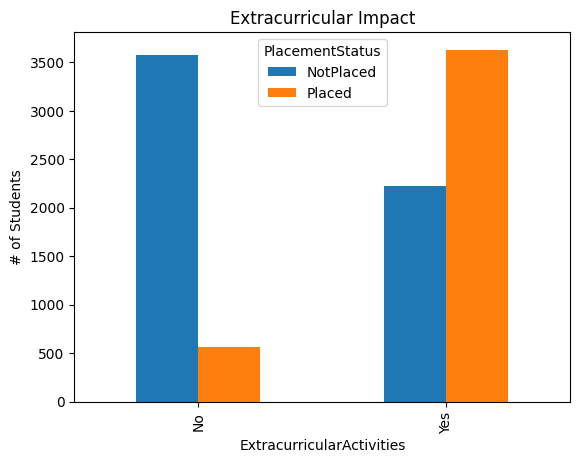

In [125]:
pd.crosstab(df['ExtracurricularActivities'], df['PlacementStatus']).plot(kind='bar', ylabel='# of Students', title='Extracurricular Impact')

copyDf = df

copyDf['ExtracurricularActivities'] = copyDf['ExtracurricularActivities'].map({'Yes': 1, 'No': 0})
copyDf['PlacementStatus'] = copyDf['PlacementStatus'].map({'Placed': 1, 'NotPlaced': 0})

print(copyDf[['ExtracurricularActivities', 'PlacementStatus']].corr())


### Insight 10:

_Almost every single applicant has completed at least one project or internship, with the vast majority having done both_

The plot below shows that, beyond an insignificant portion, the overwhelming majority of applicants have either completed at least one internship, or at least one project. Among those not undertaking both, those only doing projects have the majority, whilst the global peak remains at those doing both.

Text(0, 0.5, '# of Students')

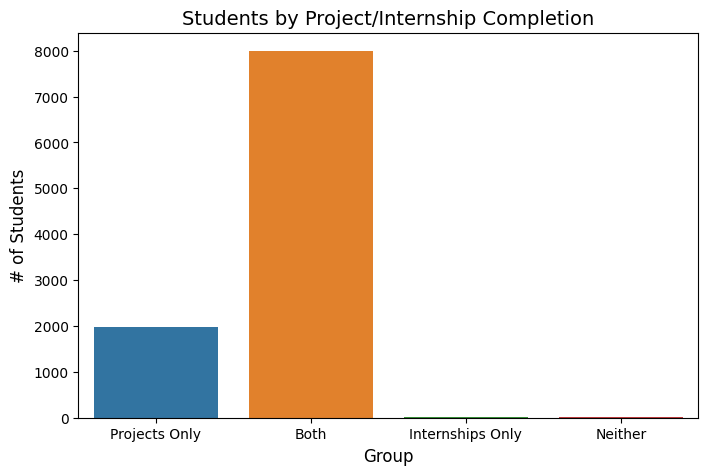

In [132]:
projects_only = (df['Projects'] > 0) & (df['Internships'] == 0)
both = (df['Projects'] > 0) & (df['Internships'] > 0)
internships_only = (df['Internships'] > 0) & (df['Projects'] == 0)
neither = (df['Internships'] == 0) & (df['Projects'] == 0)

counts = {
    "Projects Only": projects_only.sum(),
    "Both": both.sum(),
    "Internships Only": internships_only.sum(),
    "Neither": neither.sum()
}

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=list(counts.keys()), y=list(counts.values()), hue=list(counts.keys()), legend=False)
ax.set_title("Students by Project/Internship Completion", fontsize=14)
ax.set_xlabel("Group", fontsize=12)
ax.set_ylabel("# of Students", fontsize=12)

# Conclusion

The goal of this report was to analyze two distinct datasets, 'Mobile Device Usage and User Behavior' and 'Student Placement Prediction', using visualization tools, univariate analysis, and bivariate analysis. The insights derived from these datasets were aimed at understanding user behavior patterns in mobile device usage and identifying factors influencing student placement outcomes. The findings are intended to assist stakeholders in making data-driven decisions.

Some key insights:

**Mobile Device Usage and User Behavior Dataset:**
* Battery Drain: Longer screen-on times and a higher number of installed apps lead to increased battery drain.
* Screen Time: Most users fall into the "High" screen time category (6+ hours/day), indicating heavy device usage.
* Gender Differences: Male users spend 7.69% more time on apps than female users.
* Data Usage: 60.7% of users consume less than 1000 MB of data per day.
* User Behavior Class: The majority of users (20.9%) are classified under Behavior Class #2, with Behavior Class #5 users consuming 27.3% more data than users in Classes #1, #2, and #3 combined.
* Age and Behavior: Users aged 25–34 exhibit extreme usage behaviors, with peaks in both low (Class #1) and high (Class #5) usage categories.
* Operating System: iOS devices have slightly more female users, while Android devices have more male users.
* App Usage: Users with more installed apps tend to have higher app usage times.
* Device Performance: The iPhone 12 has the highest median screen-on time (5.05 hours/day) among all device models.

**Student Placement Prediction Dataset:**

* CGPA Distribution: The CGPA distribution is multimodal, with most students scoring above 7.0.
* Placement Status: The majority of students (60.7%) did not secure placements.
* Projects and Placement: Students who completed 3+ projects had a higher likelihood of securing placements compared to those with fewer projects.
* Placement Training: Students who underwent placement training were significantly more likely to secure placements.
* CGPA and Aptitude Score: CGPA and aptitude test scores are moderately correlated (0.46).
* Academic Performance: Placed students had a higher median CGPA (8.2) compared to non-placed students (7.5).
* Soft Skills: Placed students also had a higher median soft skill rating (4.6) compared to non-placed students (4.2).
* Extracurricular Activities: Participation in extracurricular activities increased the likelihood of securing placements.
* Projects and Internships: Almost all students completed at least one project or internship, with the majority completing both.


The findings from both datasets have significant implications for their respective audiences:

**Mobile Technology Industry:**
* Product Managers: Can use insights on battery drain and screen time to optimize device performance and battery life.
* Marketing Teams: Can target specific demographics, such as high-usage users or male/female-dominated OS groups.
* Executives: Can make decisions based on user behavior trends and device performance metrics.

**Education and Placement Sector:**
* Universities and Training Institutes: Can emphasize the importance of placement training, extracurricular activities, and project work to improve student placement rates.
* Students: Can focus on improving their CGPA, soft skills, and participation in internships and projects to enhance their employability.
* Employers: Can use insights on academic performance and soft skills to refine their hiring criteria.


This analysis highlights the power of data-driven decision-making. Through univariate and bivariate analysis, along with effective visualizations, we were able to uncover meaningful patterns and trends in both datasets. These insights not only provide a deeper understanding of user behavior and student placement dynamics but also offer recommendations for stakeholders to improve outcomes in their respective domains.

# References

*   Histograms - https://matplotlib.org/stable/gallery/statistics/hist.html
*   Create multiple subplots using plt.subplots - https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
*   Choosing Colormaps in Matplotlib - https://matplotlib.org/stable/users/explain/colors/colormaps.html
*   Countplot using seaborn in Python (June 12, 2021) - https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/
* Data Science Plots with Seaborn - https://neuraldatascience.io/4-viz/seaborn.html
* pandas.DataFrame.sum - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html
* How to Count Occurrences of Specific Value in Pandas Column? (November 19, 2024) - https://www.geeksforgeeks.org/how-to-count-occurrences-of-specific-value-in-pandas-column/
* ChatGPT transcript for the helper codeblock determining whether dataset 2 has 10000 distinct entries: https://chatgpt.com/share/679cf17c-fc74-8008-a4b8-cc95d5037a7a